In [114]:
import pandas as pd
import sigfig
import matplotlib.pyplot as plt
import math

redondeo

In [115]:
def rd(valor, error):
    return eval('("' + sigfig.round(valor, error, cutoff=19, sep ='","') + '")')

In [116]:
rd(0.087214, 0.0001256)

('0.08721', '0.00013')

In [117]:
rd(1280.23, 3.1456)

('1280', '3')

pasar de pandas a latex

In [118]:
def tex(panda, columnas):
    l = len(panda)
    a = len(columnas)
    print('\\begin{array}{|' + 'l|'*a + '} \\hline')
    for fila in range(l):
        s = ''
        for col in columnas:
            s+= str(panda[col][fila]) + ' & '
        print(s[0: -2] + ' \\\\ \\hline')
    print('\\end{array}')

importar datos

In [119]:
datos = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/pendulo/Datos/pendulo.csv', names=['b', 't1', 't2', 't3', 't4', 't5'])

tabla 1

In [120]:
tex(datos, ['b', 't1', 't2', 't3', 't4', 't5'])

\begin{array}{|l|l|l|l|l|l|} \hline
0.08 & 15.07 & 15.13 & 15.19 & 15.13 & 15.0  \\ \hline
0.09 & 14.31 & 13.28 & 14.31 & 14.28 & 14.38  \\ \hline
0.1 & 13.91 & 13.91 & 13.97 & 13.82 & 13.78  \\ \hline
0.11 & 13.53 & 13.44 & 13.25 & 13.37 & 13.78  \\ \hline
0.12 & 13.25 & 13.37 & 13.4 & 13.16 & 13.19  \\ \hline
0.13 & 13.06 & 12.97 & 13.03 & 13.12 & 12.97  \\ \hline
0.14 & 12.84 & 12.81 & 12.88 & 12.84 & 12.72  \\ \hline
0.15 & 12.56 & 12.5 & 12.72 & 12.69 & 12.78  \\ \hline
0.16 & 12.53 & 12.63 & 12.59 & 12.5 & 12.47  \\ \hline
0.17 & 12.44 & 12.41 & 12.53 & 12.44 & 12.5  \\ \hline
0.18 & 12.44 & 12.43 & 12.5 & 12.54 & 12.47  \\ \hline
0.19 & 12.34 & 12.47 & 12.31 & 12.35 & 12.28  \\ \hline
0.2 & 12.37 & 12.5 & 12.37 & 12.47 & 12.43  \\ \hline
0.21 & 12.16 & 12.4 & 12.56 & 12.6 & 12.19  \\ \hline
0.22 & 12.46 & 12.53 & 12.62 & 12.53 & 12.37  \\ \hline
0.23 & 12.59 & 12.5 & 12.41 & 12.62 & 12.56  \\ \hline
0.24 & 12.56 & 12.62 & 12.57 & 12.59 & 12.59  \\ \hline
0.25 & 25.03 & 25.22 & 2

In [121]:
for i in range(17, 21):
    for j in range(1, 6):
        datos['t'+str(j)][i] /= 2

media y su error

In [122]:
datos['t*'] = (datos['t1']+datos['t2']+datos['t3']+datos['t4']+datos['t5'])/50
datos['et*'] = (datos['t1']/10 - datos['t*'])**2
for i in range(2, 6):
    col = 't' + str(i)
    datos['et*'] += (datos[col]/10 - datos['t*'])**2
datos['et*'] = datos['et*']/25
datos['et*'] = datos['et*']**0.5
datos[['t*str', 'et*str']] = datos[['t*', 'et*']].astype(str)
for i in range(len(datos)):
    a, b = rd(datos['t*'][i], datos['et*'][i])
    datos['t*str'][i], datos['et*str'][i] = a, b
    datos['t*'][i], datos['et*'][i] = a, b

C:\Users\User\AppData\Local\Temp/ipykernel_3852/704249332.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['t*str'][i], datos['et*str'][i] = a, b
C:\Users\User\AppData\Local\Temp/ipykernel_3852/704249332.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['t*'][i], datos['et*'][i] = a, b


<ErrorbarContainer object of 3 artists>

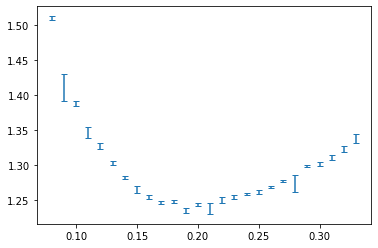

In [123]:
plt.errorbar(datos['b'], datos['t*'], yerr=datos['et*'], ls='none', capsize = 3)

$T^2b$ y su error

In [124]:
datos['b2'] = round(datos['b']**2, 4) #ver 0.07**2
datos['t2b'] = datos['b']*datos['t*']**2
datos['et2b'] = 2*datos['b']*datos['t*']*datos['et*']
datos[['t2bstr', 'et2bstr']] = datos[['t*', 'et*']].astype(str)
for i in range(len(datos)):
    a, b = rd(datos['t2b'][i], datos['et2b'][i])
    datos['t2bstr'][i], datos['et2bstr'][i] = a, b
    datos['t2b'][i], datos['et2b'][i] = a, b

C:\Users\User\AppData\Local\Temp/ipykernel_3852/3195269699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['t2bstr'][i], datos['et2bstr'][i] = a, b
C:\Users\User\AppData\Local\Temp/ipykernel_3852/3195269699.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['t2b'][i], datos['et2b'][i] = a, b


tabla 2

In [125]:
tex(datos, ['b', 't*str', 'et*str', 't2bstr', 'et2bstr'])

\begin{array}{|l|l|l|l|l|} \hline
0.08 & 1.510 & 0.003 & 0.1824 & 0.0007  \\ \hline
0.09 & 1.411 & 0.019 & 0.179 & 0.005  \\ \hline
0.1 & 1.388 & 0.003 & 0.1927 & 0.0008  \\ \hline
0.11 & 1.347 & 0.008 & 0.200 & 0.002  \\ \hline
0.12 & 1.327 & 0.004 & 0.2113 & 0.0013  \\ \hline
0.13 & 1.303 & 0.003 & 0.2207 & 0.0010  \\ \hline
0.14 & 1.282 & 0.002 & 0.2301 & 0.0007  \\ \hline
0.15 & 1.265 & 0.005 & 0.2400 & 0.0019  \\ \hline
0.16 & 1.254 & 0.003 & 0.2516 & 0.0012  \\ \hline
0.17 & 1.246 & 0.002 & 0.2639 & 0.0008  \\ \hline
0.18 & 1.2476 & 0.0018 & 0.2802 & 0.0008  \\ \hline
0.19 & 1.235 & 0.003 & 0.2898 & 0.0014  \\ \hline
0.2 & 1.243 & 0.002 & 0.3090 & 0.0010  \\ \hline
0.21 & 1.238 & 0.008 & 0.322 & 0.004  \\ \hline
0.22 & 1.250 & 0.004 & 0.344 & 0.002  \\ \hline
0.23 & 1.254 & 0.003 & 0.3617 & 0.0017  \\ \hline
0.24 & 1.2586 & 0.0009 & 0.3802 & 0.0005  \\ \hline
0.25 & 1.261 & 0.003 & 0.3975 & 0.0019  \\ \hline
0.26 & 1.2681 & 0.0015 & 0.4181 & 0.0010  \\ \hline
0.27 & 1.2773 & 0.00

regresión

In [126]:
def regresion(x, y):
    n = len(x)
    xc = x.sum()/n
    yc = y.sum()/n
    sx = math.sqrt(((x**2).sum()/n)-xc**2)
    sy = math.sqrt(((y**2).sum()/n)-yc**2)
    sxy = ((x*y).sum()/n)-xc*yc
    r = sxy/(sx*sy)
    m = sxy/(sx**2)
    b = yc - m*xc
    em = (sy/sx)*math.sqrt((1-r**2)/(n-2))
    eb = em*math.sqrt(sx**2 + xc**2)
    return(m, b, em, eb, r)

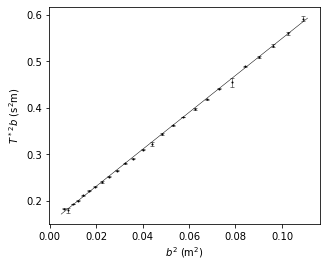

In [127]:
m, n, em, en, r = regresion(datos['b2'], datos['t2b'])
plt.axes().set_aspect(0.2)
plt.xlabel('$b^2$ (m$^2$)')
plt.ylabel('${T^*}^2b$ (s$^2$m)')
plt.plot([0.005, 0.111], [m*0.005+n, m*0.111+n], color='black', linewidth=0.5)
plt.errorbar(datos['b2'], datos['t2b'], yerr=datos['et2b'], ls='none', capsize = 2, elinewidth=0.5, ecolor='black', capthick=0.5, marker='o', markersize=1, markeredgecolor='black', markerfacecolor='black')
plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/pendulo/figures/regresión.png', dpi=300, bbox_inches='tight')

g, k y sus errores

In [128]:
m, em = rd(m, em)
m, em = float(m), float(em)
n, en = rd(n, en)
n, en = float(n), float(en)

In [129]:
g = 4*math.pi**2/m
eg = em*4*math.pi**2/m**2

In [130]:
print('g:', rd(g, eg))
g, eg = rd(g, eg)
g, eg = float(g), float(eg)

g: ('9.92', '0.05')


In [131]:
k = math.sqrt(n*g)/(2*math.pi)
ek = math.sqrt( (n* eg**2)/g + (g* en**2)/n)/math.pi
print('k', rd(k, ek))

k ('0.195', '0.004')


In [132]:
datos

,b,t1,t2,t3,t4,t5,t*,et*,t*str,et*str,b2,t2b,et2b,t2bstr,et2bstr
0,0.08,15.070,15.130,15.190,15.130,15.000,1.5100,0.0030,1.510,0.003,0.0064,0.1824,0.0007,0.1824,0.0007
1,0.09,14.310,13.280,14.310,14.280,14.380,1.4110,0.0190,1.411,0.019,0.0081,0.1790,0.0050,0.179,0.005
2,0.10,13.910,13.910,13.970,13.820,13.780,1.3880,0.0030,1.388,0.003,0.0100,0.1927,0.0008,0.1927,0.0008
3,0.11,13.530,13.440,13.250,13.370,13.780,1.3470,0.0080,1.347,0.008,0.0121,0.2000,0.0020,0.200,0.002
4,0.12,13.250,13.370,13.400,13.160,13.190,1.3270,0.0040,1.327,0.004,0.0144,0.2113,0.0013,0.2113,0.0013
5,0.13,13.060,12.970,13.030,13.120,12.970,1.3030,0.0030,1.303,0.003,0.0169,0.2207,0.0010,0.2207,0.0010
6,0.14,12.840,12.810,12.880,12.840,12.720,1.2820,0.0020,1.282,0.002,0.0196,0.2301,0.0007,0.2301,0.0007
7,0.15,12.560,12.500,12.720,12.690,12.780,1.2650,0.0050,1.265,0.005,0.0225,0.2400,0.0019,0.2400,0.0019
8,0.16,12.530,12.630,12.590,12.500,12.470,1.2540,0.0030,1.254,0.003,0.0256,0.2516,0.0012,0.2516,0.0012
9,0.17,12.440,12.410,12.530,12.440,12.500,1.2460,0.0020,1.246,0.002,0.0289,0.2639,0.0008,0.2639,0.0008
